# Simulación del Comportamiento de un Reactor Químico Sin Control

## Descripción del Proceso

En esta simulación, modelamos un **reactor continuo de tanque agitado (CSTR)** sin control, donde se lleva a cabo una reacción exotérmica. Este tipo de reactor es ampliamente utilizado en la industria química para procesos como la producción de químicos, tratamientos de aguas residuales, y otras reacciones en fase líquida o gaseosa. El modelo supone que el contenido del reactor está perfectamente mezclado, lo que significa que las concentraciones y temperaturas son uniformes dentro del reactor.

### Ecuaciones del Modelo

Las siguientes ecuaciones diferenciales describen el comportamiento dinámico del reactor y la chaqueta:

1. **Velocidad de reacción (Arrhenius):**

   $$K = \alpha \cdot e^{-\frac{E}{R \cdot T}}$$

   Donde \(K\) es la constante de velocidad de reacción, que depende de la temperatura del reactor.

2. **Ecuación de la concentración del reactivo A:**

   $$\frac{dC_A}{dt} = \frac{F_o (C_{A_o} - C_A)}{V} - K \cdot C_A$$

   Esta ecuación modela la variación de la concentración del reactivo A en el reactor.

3. **Ecuación de la concentración del producto B:**

   $$\frac{dC_B}{dt} = K \cdot C_A - \frac{F_o}{V} \cdot C_B$$

   Esta ecuación describe la formación del producto B en el reactor.

4. **Ecuación de la temperatura del reactor:**

   $$\frac{dT}{dt} = \frac{F_o (T_o - T)}{V} - \frac{\phi \cdot K \cdot C_A}{p \cdot Cp} - \frac{U \cdot A \cdot (T - T_j)}{p \cdot Cp \cdot V}$$

   Modela la variación de la temperatura dentro del reactor debido a la reacción exotérmica y la transferencia de calor hacia la chaqueta.

5. **Ecuación de la temperatura de la chaqueta:**

   $$\frac{dT_j}{dt} = \frac{F_j (T_{jo} - T_j)}{V_j} + \frac{U \cdot A \cdot (T - T_j)}{p_j \cdot Cp_j \cdot V_j}$$

   Describe cómo cambia la temperatura en la chaqueta debido al intercambio de calor con el reactor.

### Objetivo de la Simulación

El objetivo de esta simulación es analizar el comportamiento del reactor sin control, observando cómo varían las concentraciones de reactivo y producto, así como las temperaturas en el reactor y la chaqueta. Esto proporciona una visión de la dinámica natural del sistema, que es crucial para entender los riesgos operativos, como el sobrecalentamiento, y para diseñar estrategias de control efectivas en etapas posteriores.

### Importancia del Análisis Sin Control

El análisis del proceso sin control permite:

- **Entender la Dinámica del Sistema**: Identificar cómo responden las variables clave sin intervención externa.
- **Identificar Problemas Potenciales**: Detectar inestabilidades, como sobrecalentamiento, que pueden requerir control.
- **Base para Estrategias de Control**: Proporcionar un punto de partida para diseñar sistemas de control que mantengan el reactor en condiciones óptimas y seguras.

Esta simulación es esencial en el diseño y operación de reactores, ayudando a prever comportamientos indeseados y asegurando la seguridad y eficiencia del proceso.


## Código

### Importación de bibliotecas necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import math as m

### Parámetros del sistema

In [2]:
Fo = 1.13    # Flujo volumétrico de alimentación [m^3/h]
CAo = 10.64  # Concentración inicial del reactante A [mol/m^3]
CBo = 0      # Concentración inicial del producto B [mol/m^3]
V = 1.36     # Volumen del reactor [m^3]
Fj = 1.41    # Flujo volumétrico de alimentación de la chaqueta [m^3/h]
R = 1.17     # Constante de los gases [J/mol.K]
Vj = 0.11    # Volumen de la chaqueta [m^3]
alfa = 7.08  # Factor pre-exponencial de Arrhenius [1/h]
E = 31.650   # Energía de activación de la reacción [J/mol]
U = 945.84   # Coeficiente de transferencia de calor [J/h.m^2.K]
fi = -31.660 # Calor exotérmico de la reacción [J/mol]
A = 23.24    # Área de transferencia de calor [m^2]
Tjo = 300    # Temperatura inicial de la chaqueta [K]
To = 800     # Temperatura de alimentación del reactor [K]
Cp = 0.98    # Capacidad calorífica promedio de la mezcla reaccionante [J/kg.K]
Cpj = 1.3    # Capacidad calorífica del fluido en la chaqueta [J/kg.K]
p = 793.97   # Densidad de la mezcla reaccionante [kg/m^3]
pj = 989.29  # Densidad del fluido en la chaqueta [kg/m^3]

### Definición del modelo del sistema (ecuaciones diferenciales)

In [3]:
def model(t, y):
    # Variables de estado: Concentración del reactivo A, producto B, temperatura del reactor y chaqueta
    CA, CB, T, Tj = y

    # Cálculo de la constante de reacción usando la ecuación de Arrhenius
    K = alfa * m.exp(-E / (R * T))

    # Definición de las ecuaciones diferenciales del sistema
    # Tasa de cambio de la concentración de A
    dCA_dt = Fo * (CAo - CA) / V - K * CA

    # Tasa de cambio de la concentración de B
    dCB_dt = K * CA - (Fo / V) * CB

    # Tasa de cambio de la temperatura del reactor
    dT_dt = (Fo / V) * (To - T) - (fi * K * CA) / (p * Cp) - U * A * (T - Tj) / (p * Cp * V)
    
    # Tasa de cambio de la temperatura de la chaqueta
    dTj_dt = (Fj / Vj) * (Tjo - Tj) + U * A * (T - Tj) / (pj * Cpj * Vj)                     
    
    # Retorno de las derivadas
    return [dCA_dt, dCB_dt, dT_dt, dTj_dt]

### Calculos de Resultados

In [13]:
# Parámetros de la simulación
t_span = (0, 3)                # Intervalo de tiempo de la simulación (0 a 3 horas)
t_eval = np.arange(0, 3, 0.01) # Puntos de tiempo en los que se evaluará la solución (intervalo de 0.01 h)

# Condiciones iniciales del sistema
y0 = [CAo, CBo, To, Tjo]

# Resolución del sistema de ecuaciones diferenciales usando el método de Runge-Kutta de 5º orden
solution = solve_ivp(model, t_span, y0, t_eval=t_eval)

# Extracción de los resultados de la simulación
tiempo = solution.t
mCA, mCB, mT, mTj = solution.y

### Visualización de Resultados

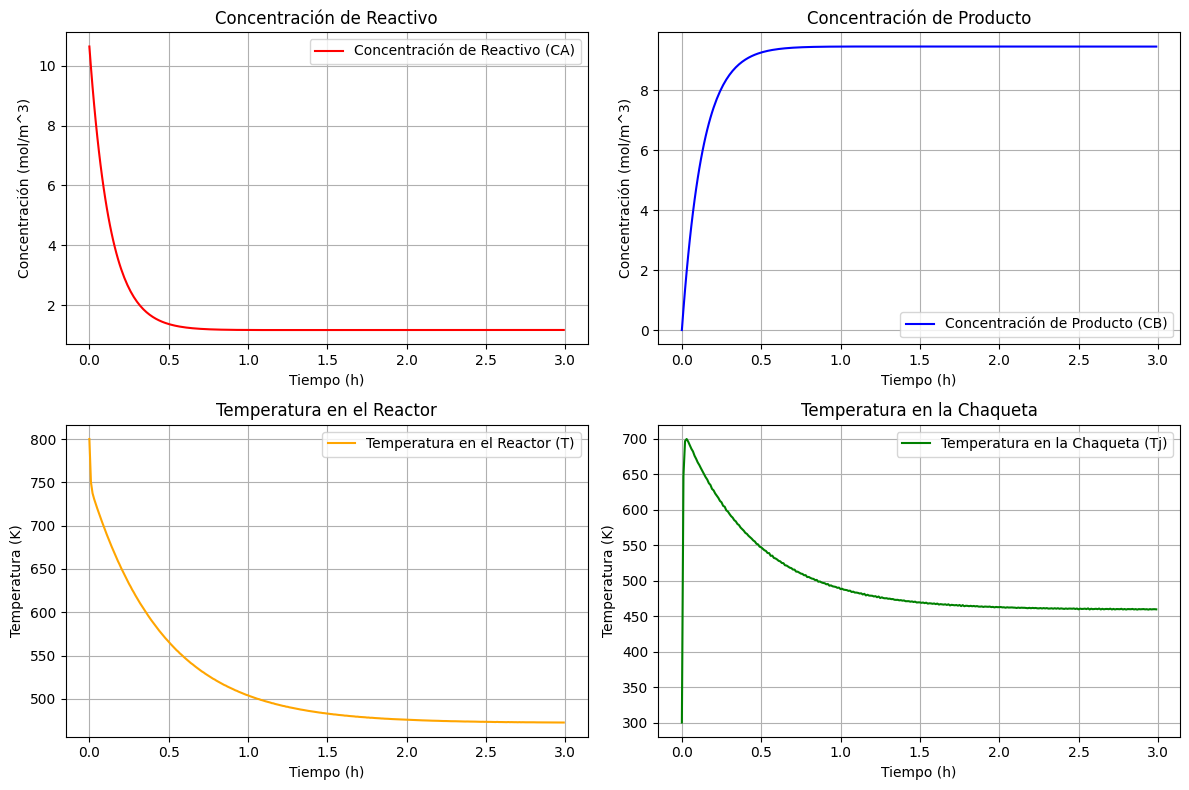

In [14]:
# Gráficos de los resultados
plt.figure(figsize=(12, 8))

# Gráfico 1: Concentración de Reactivo (CA)
plt.subplot(221)
plt.plot(tiempo, mCA, label='Concentración de Reactivo (CA)', color='red')
plt.grid(True)
plt.title('Concentración de Reactivo')
plt.ylabel('Concentración (mol/m^3)')
plt.xlabel('Tiempo (h)')
plt.legend()

# Gráfico 2: Concentración de Producto (CB)
plt.subplot(222)
plt.plot(tiempo, mCB, label='Concentración de Producto (CB)', color='blue')
plt.grid(True)
plt.title('Concentración de Producto')
plt.ylabel('Concentración (mol/m^3)')
plt.xlabel('Tiempo (h)')
plt.legend()

# Gráfico 3: Temperatura en el Reactor (T)
plt.subplot(223)
plt.plot(tiempo, mT, label='Temperatura en el Reactor (T)', color='orange')
plt.grid(True)
plt.title('Temperatura en el Reactor')
plt.ylabel('Temperatura (K)')
plt.xlabel('Tiempo (h)')
plt.legend()

# Gráfico 4: Temperatura en la Chaqueta (Tj)
plt.subplot(224)
plt.plot(tiempo, mTj, label='Temperatura en la Chaqueta (Tj)', color='green')
plt.grid(True)
plt.title('Temperatura en la Chaqueta')
plt.ylabel('Temperatura (K)')
plt.xlabel('Tiempo (h)')
plt.legend()

# Ajuste y visualización de la figura
plt.tight_layout()
plt.show()

## Referencias

1. **Modelización de Fallas en Reactor Químico con Agitación (CSTR)**. Este artículo sirvió como base para obtener los datos de parámetros y constantes del reactor, garantizando que la simulación refleje un comportamiento realista y ajustado a las condiciones típicas de operación de un CSTR.